<a href="https://colab.research.google.com/github/AnkitNigam1985/Data-Science-Projects/blob/master/HR_Attrition_using_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id=section3></a>
### Data Loading and description

### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Data/Assignment/Attrition_LDA.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


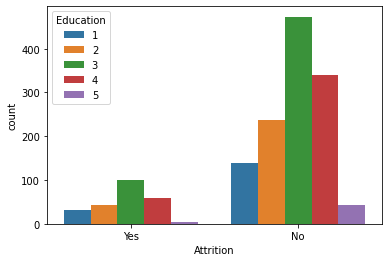

In [3]:
sns.countplot(data['Attrition'], hue=data['Education'])

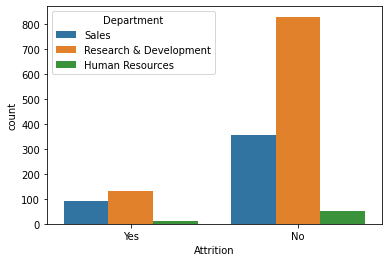

In [4]:
sns.countplot(data['Attrition'], hue=data['Department'])

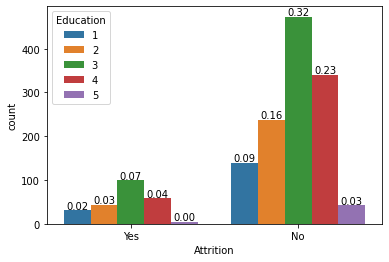

In [5]:
ax = sns.countplot(x="Attrition", hue="Education", data=data)
total = float(len(data)) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

In [6]:
((data.groupby(['Attrition','Education'])['Attrition'].count())/data.shape[0])*100

Attrition  Education
No         1             9.455782
           2            16.190476
           3            32.176871
           4            23.129252
           5             2.925170
Yes        1             2.108844
           2             2.993197
           3             6.734694
           4             3.945578
           5             0.340136
Name: Attrition, dtype: float64

The above data consists of a dependent variable Attrition and others as independent variables. Exploring the data would provide explain which model to use.

# Data Exploration

### Correlation heatmap

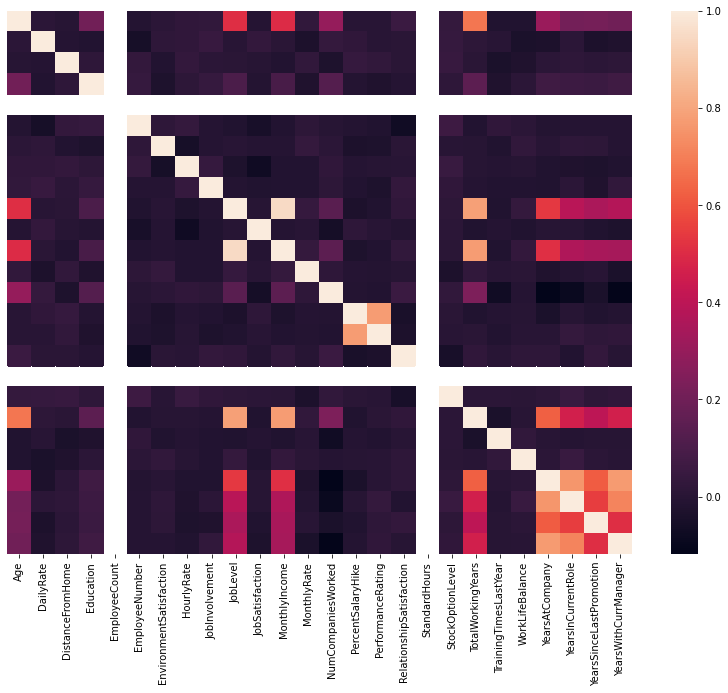

In [7]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),yticklabels=False,cbar=True,linewidths=0)
plt.show()

The above data shows there is a severe correlation in the data. Dropping these features may cause to lose enough information. We will try using decomposition to solve this problem.

### Kernel Density distribution of Daily Rate against EducationalField.

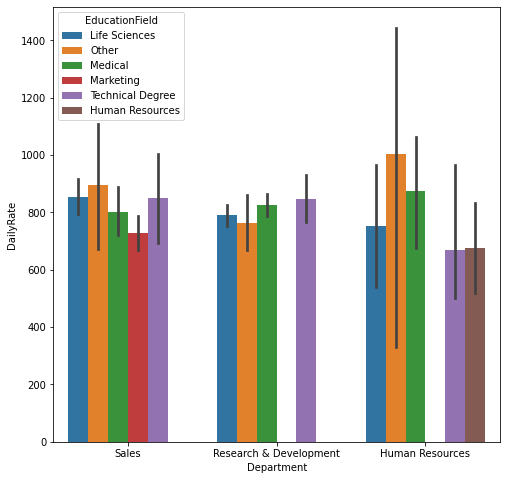

In [8]:
plt.figure(figsize=(8,8))
sns.barplot(x=data['Department'],y=data['DailyRate'],hue=data['EducationField'])
plt.show()

### Visualize count of Yes and No in the Attrition variable.

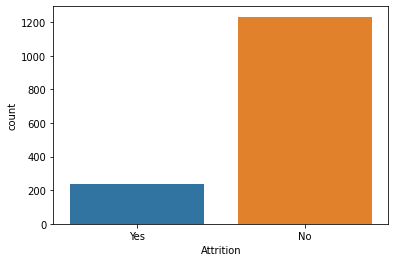

In [9]:
sns.countplot(data['Attrition'])
plt.show()

### Check the columns present in the dataset

In [10]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Feature Engineering

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<b> From the above, we can see that there are 9 categorical data. Here we have to create dummy variables of them.</b>

In [12]:
BusinessTravel = pd.get_dummies(data['BusinessTravel'],drop_first=True)

In [13]:
Department = pd.get_dummies(data['Department'],drop_first=True)

In [14]:
EducationField = pd.get_dummies(data['EducationField'],drop_first=True)

In [15]:
Gender = pd.get_dummies(data['Gender'],drop_first=True)

In [16]:
JobRole  = pd.get_dummies(data['JobRole'],drop_first=True)

In [17]:
MaritalStatus = pd.get_dummies(data['MaritalStatus'],drop_first=True)

In [18]:
Train = data.copy()

In [19]:
def StrToBin(a):
    if a == 'Yes':
        return 1
    else:
        return 0
    

In [20]:
def StrToBinb(a):
    if a == 'Y':
        return 1
    else:
        return 0
    

In [21]:
Train['Attrition']=Train['Attrition'].apply(StrToBin)

In [22]:
Train['OverTime']=Train['OverTime'].apply(StrToBin)

In [23]:
Train['Over18']=Train['Over18'].apply(StrToBinb)

In [24]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Dropping redundant variables

In [25]:
Train.drop(['Department','EducationField','Gender','BusinessTravel','JobRole','MaritalStatus'],axis=1,inplace=True)

### Concat the spliited data into one.

In [26]:
Train = pd.concat([Train,Department,EducationField,Gender,BusinessTravel,JobRole,MaritalStatus],axis=1)

As we can see, there are many features in this data. Removing the features might lose information. Instead of feature selection, We are going to extract features from this data using Linear Discriminant Analysis.

In [27]:
m = list(Train.columns)
n = list(filter(lambda t: t not in ['Attrition'], m))

In [28]:
n

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Research & Development',
 'Sales',
 'Life Sciences',
 'Marketing',
 'Medical',
 'Other',
 'Technical Degree',
 'Male',
 'Travel_Frequently',
 'Travel_Rarely',
 'Human Resources',
 'Laboratory Technician',
 'Manager',
 'Manufacturing Director',
 'Research Director',
 'Research Scientist',
 'Sales Executive',
 'Sales Representative',
 'Married',
 'Single']

# **PYCARET**

In [29]:
!pip install pycaret

In [30]:
from pycaret.classification import *

In [31]:
exp_clf101 = setup(data = Train, target = 'Attrition', session_id=123) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1470, 49)"
4,Missing Values,False
5,Numeric Features,29
6,Categorical Features,19
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [32]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.857000,0.000000,0.288600,0.622500,0.386700,0.320300
1,CatBoost Classifier,0.853100,0.782400,0.156600,0.750000,0.247100,0.204100
2,Linear Discriminant Analysis,0.852100,0.819500,0.433100,0.553300,0.481400,0.397800
3,Extreme Gradient Boosting,0.852100,0.756400,0.204800,0.602900,0.301400,0.244400
4,Light Gradient Boosting Machine,0.848300,0.760500,0.216900,0.584400,0.307800,0.245200
5,Extra Trees Classifier,0.848200,0.771300,0.091200,0.590000,0.149300,0.124400
6,Ada Boost Classifier,0.846300,0.773800,0.301500,0.547600,0.383900,0.305600
7,Gradient Boosting Classifier,0.844400,0.771700,0.223500,0.496400,0.302600,0.236100
8,Random Forest Classifier,0.842400,0.699900,0.084900,0.683300,0.145500,0.111300
9,Logistic Regression,0.840500,0.679100,0.018400,0.300000,0.034600,0.027800


In [33]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7087,0.5726,0.3750,0.2308,0.2857,0.1156
1,0.7573,0.6268,0.4375,0.3043,0.3590,0.2152
2,0.7476,0.5657,0.2941,0.2632,0.2778,0.1254
3,0.7961,0.5947,0.2941,0.3571,0.3226,0.2039
4,0.7961,0.5711,0.2353,0.3333,0.2759,0.1613
5,0.7767,0.6303,0.4118,0.3500,0.3784,0.2434
6,0.7670,0.6009,0.3529,0.3158,0.3333,0.1927
7,0.7379,0.5363,0.2353,0.2222,0.2286,0.0708
8,0.7843,0.5669,0.2500,0.2857,0.2667,0.1409
9,0.7451,0.5945,0.3750,0.2727,0.3158,0.1639


In [34]:
tuned_dt = tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8641,0.7098,0.3125,0.6250,0.4167,0.3493
1,0.7961,0.6767,0.2500,0.3077,0.2759,0.1587
2,0.8058,0.5749,0.1765,0.3333,0.2308,0.1315
3,0.8252,0.5893,0.1765,0.4286,0.2500,0.1701
4,0.8350,0.6218,0.1765,0.5000,0.2609,0.1912
5,0.7379,0.5404,0.1765,0.1875,0.1818,0.0259
6,0.8058,0.6652,0.3529,0.4000,0.3750,0.2606
7,0.8058,0.6895,0.3529,0.4000,0.3750,0.2606
8,0.7745,0.5171,0.1250,0.1818,0.1481,0.0233
9,0.7843,0.5738,0.3750,0.3333,0.3529,0.2241


In [35]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=114, max_features=37, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [36]:
tuned_rf = tune_model('rf',optimize = 'F1') #optimize = 'AUC'

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8544,0.6498,0.1875,0.6000,0.2857,0.2287
1,0.8350,0.7310,0.1875,0.4286,0.2609,0.1837
2,0.8447,0.7582,0.1765,0.6000,0.2727,0.2137
3,0.8252,0.7031,0.0000,0.0000,0.0000,-0.0187
4,0.8155,0.6720,0.0000,0.0000,0.0000,-0.0360
5,0.8835,0.7965,0.3529,0.8571,0.5000,0.4467
6,0.8447,0.7161,0.0588,1.0000,0.1111,0.0945
7,0.8155,0.7069,0.0588,0.2500,0.0952,0.0345
8,0.8235,0.5985,0.0000,0.0000,0.0000,-0.0361
9,0.8431,0.7660,0.1250,0.5000,0.2000,0.1464


In [37]:
print(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=70, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)


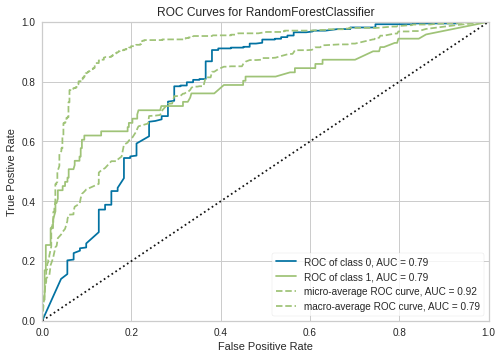

In [38]:
plot_model(tuned_rf, plot = 'auc')

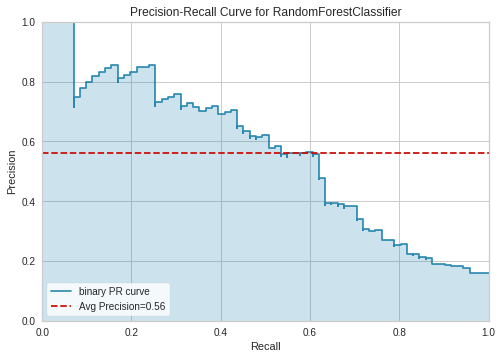

In [39]:
plot_model(tuned_rf, plot = 'pr')

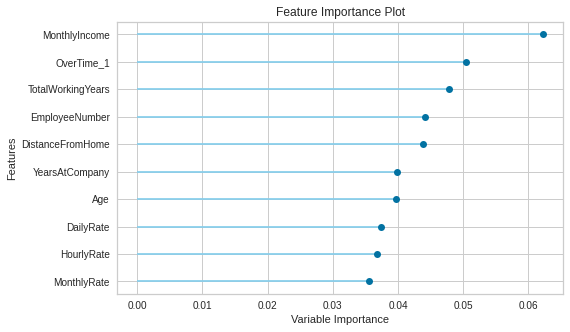

In [40]:
plot_model(tuned_rf, plot='feature')

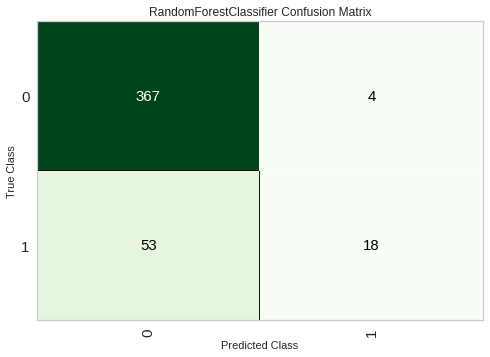

In [41]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [42]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [43]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.871,0.7857,0.2535,0.8182,0.3871,0.3367


In [44]:
final_rf = finalize_model(tuned_rf)

In [45]:
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=70, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)


In [46]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.9932,1.0,0.9577,1.0,0.9784,0.9744


In [47]:
save_model(final_rf,'Final RF Model 31May2020')

Transformation Pipeline and Model Succesfully Saved


In [48]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7087,0.5726,0.3750,0.2308,0.2857,0.1156
1,0.7573,0.6268,0.4375,0.3043,0.3590,0.2152
2,0.7476,0.5657,0.2941,0.2632,0.2778,0.1254
3,0.7961,0.5947,0.2941,0.3571,0.3226,0.2039
4,0.7961,0.5711,0.2353,0.3333,0.2759,0.1613
5,0.7767,0.6303,0.4118,0.3500,0.3784,0.2434
6,0.7670,0.6009,0.3529,0.3158,0.3333,0.1927
7,0.7379,0.5363,0.2353,0.2222,0.2286,0.0708
8,0.7843,0.5669,0.2500,0.2857,0.2667,0.1409
9,0.7451,0.5945,0.3750,0.2727,0.3158,0.1639


In [49]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8738,0.6595,0.3125,0.7143,0.4348,0.3758
1,0.8544,0.7874,0.1875,0.6000,0.2857,0.2287
2,0.8544,0.8776,0.1176,1.0000,0.2105,0.1821
3,0.8252,0.6973,0.0588,0.3333,0.1000,0.0531
4,0.8350,0.5585,0.0588,0.5000,0.1053,0.0731
5,0.8544,0.8266,0.2941,0.6250,0.4000,0.3291
6,0.8155,0.6871,0.0000,0.0000,0.0000,-0.0360
7,0.8155,0.6262,0.0000,0.0000,0.0000,-0.0360
8,0.8725,0.6399,0.1875,1.0000,0.3158,0.2801
9,0.8333,0.7453,0.1250,0.4000,0.1905,0.1251


In [50]:
print(bagged_dt)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=123,
 

In [51]:
boosted_dt = ensemble_model(dt, method = 'Boosting') #n_estimators=50

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7379,0.5643,0.3125,0.2381,0.2703,0.1140
1,0.7767,0.6893,0.5625,0.3600,0.4390,0.3079
2,0.7573,0.5951,0.3529,0.3000,0.3243,0.1776
3,0.7961,0.5947,0.2941,0.3571,0.3226,0.2039
4,0.7961,0.5711,0.2353,0.3333,0.2759,0.1613
5,0.7961,0.6891,0.5294,0.4091,0.4615,0.3383
6,0.7670,0.5773,0.2941,0.2941,0.2941,0.1546
7,0.7379,0.5363,0.2353,0.2222,0.2286,0.0708
8,0.7451,0.5182,0.1875,0.1875,0.1875,0.0363
9,0.7255,0.5320,0.2500,0.2000,0.2222,0.0580


In [52]:
gbc = create_model('gbc', verbose = False)
dt = create_model('dt', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)
xgboost = create_model('xgboost', verbose = False)

In [53]:
blend_specific_soft = blend_models(estimator_list = [gbc,dt, lightgbm, xgboost], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8835,0.6925,0.3750,0.7500,0.5000,0.4422
1,0.8350,0.7859,0.2500,0.4444,0.3200,0.2344
2,0.8447,0.7914,0.2353,0.5714,0.3333,0.2623
3,0.8155,0.7517,0.1176,0.3333,0.1739,0.0961
4,0.8447,0.7661,0.1765,0.6000,0.2727,0.2137
5,0.8835,0.7880,0.4118,0.7778,0.5385,0.4789
6,0.8350,0.7435,0.1765,0.5000,0.2609,0.1912
7,0.8252,0.7230,0.2941,0.4545,0.3571,0.2614
8,0.8725,0.6868,0.2500,0.8000,0.3810,0.3310
9,0.8333,0.7515,0.1250,0.4000,0.1905,0.1251


In [54]:

blend_specific_hard = blend_models(estimator_list = [gbc, dt, lightgbm, xgboost], method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8738,0.0,0.3125,0.7143,0.4348,0.3758
1,0.8544,0.0,0.2500,0.5714,0.3478,0.2797
2,0.8641,0.0,0.2353,0.8000,0.3636,0.3120
3,0.8252,0.0,0.0588,0.3333,0.1000,0.0531
4,0.8252,0.0,0.0000,0.0000,0.0000,-0.0187
5,0.8835,0.0,0.3529,0.8571,0.5000,0.4467
6,0.8350,0.0,0.0588,0.5000,0.1053,0.0731
7,0.8544,0.0,0.2941,0.6250,0.4000,0.3291
8,0.8529,0.0,0.1250,0.6667,0.2105,0.1694
9,0.8529,0.0,0.1250,0.6667,0.2105,0.1694


In [55]:
stack_hard = stack_models([gbc, dt, lightgbm, xgboost], method='hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8544,0.7047,0.0625,1.0,0.1176,0.1012
1,0.8447,0.7112,0.0000,0.0,0.0000,0.0000
2,0.8350,0.7189,0.0000,0.0,0.0000,0.0000
3,0.8350,0.6389,0.0000,0.0,0.0000,0.0000
4,0.8350,0.7373,0.0000,0.0,0.0000,0.0000
5,0.8447,0.7948,0.0588,1.0,0.1111,0.0945
6,0.8350,0.5267,0.0000,0.0,0.0000,0.0000
7,0.8252,0.6012,0.0000,0.0,0.0000,-0.0187
8,0.8431,0.6759,0.0000,0.0,0.0000,0.0000
9,0.8431,0.7594,0.0000,0.0,0.0000,0.0000


In [56]:
stack_soft2 = stack_models([gbc, dt, lightgbm], meta_model=xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8641,0.7119,0.2500,0.6667,0.3636,0.3047
1,0.8447,0.7500,0.3125,0.5000,0.3846,0.3011
2,0.8544,0.7825,0.2353,0.6667,0.3478,0.2864
3,0.8155,0.7114,0.0588,0.2500,0.0952,0.0345
4,0.8155,0.7449,0.0000,0.0000,0.0000,-0.0360
5,0.8544,0.7907,0.2941,0.6250,0.4000,0.3291
6,0.8155,0.6587,0.1765,0.3750,0.2400,0.1502
7,0.8350,0.7456,0.2941,0.5000,0.3704,0.2827
8,0.8333,0.6991,0.1250,0.4000,0.1905,0.1251
9,0.8235,0.7660,0.1250,0.3333,0.1818,0.1053


<a id=section9></a>
### Conclusions

From this we can see that the best algorithm to predict if an employee will leave or not is **KNN** followed by **Logistic Regression**.